In [1]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
from time import time
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report, mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import *
from sklearn import metrics
from sklearn.model_selection import train_test_split


import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.
/Users/hridoy/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/hridoy/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/hridoy/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/hridoy/anaconda3/lib/python3.7/site-packages/t

In [2]:

# Let's first load the data and take a look at what we have.
df = pd.read_csv('Heathrow_combined.csv')

In [3]:
df=df.dropna()

In [4]:
df

,Date,Nox_tropo,Nox_ground,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,10/7/18,232.1240,59.746988,18.7,15.5,22.6,0.0,75.0,12.5,1023.9
1,11/7/18,168.0445,73.870523,18.6,13.9,23.4,0.0,45.0,10.1,1021.8
2,12/7/18,194.0030,59.394005,19.2,13.7,24.4,0.0,52.0,8.4,1021.5
3,13/7/18,343.2730,68.192323,20.6,15.7,26.8,0.0,135.0,10.1,1021.8
4,14/7/18,190.1570,78.645600,21.8,14.9,27.8,0.0,177.0,10.2,1020.0
...,...,...,...,...,...,...,...,...,...,...
772,6/1/21,85.2440,40.983786,3.2,0.1,5.6,0.5,89.0,11.3,1019.5
773,7/1/21,163.9400,37.200143,-0.1,-1.7,2.1,0.0,277.0,10.6,1018.6
774,9/1/21,282.0585,58.818259,0.1,-2.1,2.6,0.0,178.0,6.6,1026.4
775,16/1/21,147.2020,37.496792,4.8,-0.8,8.3,0.5,214.0,14.8,1020.0


In [5]:
df.drop(['Date'], 
               axis=1,
              inplace=True)


In [6]:
df

,Nox_tropo,Nox_ground,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,232.1240,59.746988,18.7,15.5,22.6,0.0,75.0,12.5,1023.9
1,168.0445,73.870523,18.6,13.9,23.4,0.0,45.0,10.1,1021.8
2,194.0030,59.394005,19.2,13.7,24.4,0.0,52.0,8.4,1021.5
3,343.2730,68.192323,20.6,15.7,26.8,0.0,135.0,10.1,1021.8
4,190.1570,78.645600,21.8,14.9,27.8,0.0,177.0,10.2,1020.0
...,...,...,...,...,...,...,...,...,...
772,85.2440,40.983786,3.2,0.1,5.6,0.5,89.0,11.3,1019.5
773,163.9400,37.200143,-0.1,-1.7,2.1,0.0,277.0,10.6,1018.6
774,282.0585,58.818259,0.1,-2.1,2.6,0.0,178.0,6.6,1026.4
775,147.2020,37.496792,4.8,-0.8,8.3,0.5,214.0,14.8,1020.0


In [7]:
# Separate Target Variable and Predictor Variables
TargetVariable=['Nox_tropo']
Predictors=['Nox_ground', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd','pres']

X=df[Predictors].values
y=df[TargetVariable].values
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/150
406/406 [==============================] - 0s 419us/step - loss: 1.6918
Epoch 2/150
406/406 [==============================] - 0s 25us/step - loss: 1.5878
Epoch 3/150
406/406 [==============================] - 0s 65us/step - loss: 1.4993
Epoch 4/150
406/406 [==============================] - 0s 46us/step - loss: 1.4168
Epoch 5/150
406/406 [==============================] - 0s 63us/step - loss: 1.3457
Epoch 6/150
406/406 [==============================] - 0s 160us/step - loss: 1.2800
Epoch 7/150
406/406 [==============================] - 0s 218us/step - loss: 1.2229
Epoch 8/150
406/406 [==============================] - 0s 20us/step - loss: 1.1702
Epoch 9/150
406/406 [==============================] - 0s 46us/step - loss: 1.1242
Epoch 10/150
406/406 [==============================] - 0s 48us/step - loss: 1.0789
Epoch 11/150
406/406 [========================

406/406 [==============================] - 0s 28us/step - loss: 0.6749
Epoch 92/150
406/406 [==============================] - 0s 23us/step - loss: 0.6741
Epoch 93/150
406/406 [==============================] - 0s 35us/step - loss: 0.6738
Epoch 94/150
406/406 [==============================] - 0s 37us/step - loss: 0.6733
Epoch 95/150
406/406 [==============================] - 0s 34us/step - loss: 0.6727
Epoch 96/150
406/406 [==============================] - 0s 35us/step - loss: 0.6726
Epoch 97/150
406/406 [==============================] - 0s 41us/step - loss: 0.6719
Epoch 98/150
406/406 [==============================] - 0s 29us/step - loss: 0.6717
Epoch 99/150
406/406 [==============================] - 0s 24us/step - loss: 0.6712
Epoch 100/150
406/406 [==============================] - 0s 61us/step - loss: 0.6713
Epoch 101/150
406/406 [==============================] - 0s 27us/step - loss: 0.6704
Epoch 102/150
406/406 [==============================] - 0s 32us/step - loss: 0.6699
Ep

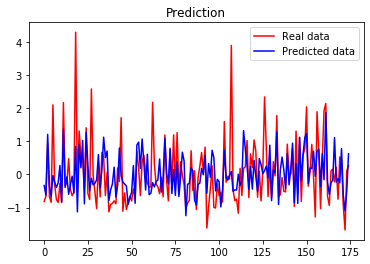

In [8]:
#model

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(15, activation = 'relu', input_dim = 8))



# Adding the third hidden layer
# model.add(Dense(units = 15, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 1))

#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 80, epochs = 150)

y_pred = model.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [17]:
y_pred

array([[-0.33420435],
       [-0.6250393 ],
       [ 1.2069767 ],
       [-0.33549452],
       [-0.6689603 ],
       [-0.0350052 ],
       [-0.23154145],
       [-0.3934464 ],
       [-0.25407434],
       [ 0.26873112],
       [-0.82311887],
       [ 1.3681564 ],
       [-0.39102495],
       [-0.07399394],
       [-0.598351  ],
       [-0.30815375],
       [-0.0570552 ],
       [-0.56111914],
       [ 0.8468179 ],
       [-1.129149  ],
       [ 0.89596033],
       [ 0.19916812],
       [ 1.0262249 ],
       [-0.88674515],
       [ 1.2648139 ],
       [ 0.28780037],
       [-0.49867964],
       [-0.11278071],
       [-0.31100318],
       [-0.2699083 ],
       [-0.16468716],
       [ 0.5981986 ],
       [-0.40670985],
       [ 0.13313903],
       [ 1.1209171 ],
       [ 0.50800616],
       [ 0.706093  ],
       [-0.78687936],
       [-0.46479428],
       [-0.2907732 ],
       [ 0.2186077 ],
       [-0.6829274 ],
       [-0.32974508],
       [ 0.79546756],
       [-0.03038689],
       [-0

In [10]:
from math import sqrt
rmse = sqrt(mean_squared_error(y_pred, y_test))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.793


In [12]:
r2_score(y_test, y_pred)

0.3119848934025632

In [13]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD
from keras.constraints import maxnorm
##############################################################
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
##############################################################
# load dataset
import pandas as pd
# df = pd.read_csv('~/Desktop/Personal/expt/UCI_Credit_Card.csv', sep=',') 
# print(df.shape) # 30000, 25
# type(df) # pandas.core.frame.DataFrame.
# df.head(1)


# split into input (X) and output (Y) variables
# # we do not need column named ID
# columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
#            'PAY_0',  'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', # PAY_1 is absent
#            'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
#            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
# # sex, education, marriage are categorical variables - TBD
# # split data into test and train - TBD
# X = df[columns].values
# Y = df["default.payment.next.month"]
# print(type(X)) # numpy.ndarray
# input_dim = X.shape[1] # number of columns
# print(input_dim) # 23
input_dim = 8 # number of columns
print(input_dim) # 23


# Function to create model, required for KerasClassifier
def create_model():
    # default values
    activation='relu' # or linear
    dropout_rate=0.0 # or 0.2
    init_mode='uniform'
    weight_constraint=0 # or  4
    optimizer='adam' # or SGD
    lr = 0.01
    momemntum=0
    # create model
    model = Sequential()
    model.add(Dense(15, 
                    input_dim=input_dim,  
                    kernel_initializer=init_mode, 
                    activation=activation,
                    kernel_constraint=maxnorm(weight_constraint))
                    )
#     model.add(Dense(units = 35, activation = 'relu'))
    model.add(Dense(units = 1))
    # Compile model
    model.compile(loss='mean_squared_error', 
                  optimizer=optimizer, 
               
                  )
    return model

# create model
model = KerasRegressor(build_fn=create_model, batch_size=100, epochs=100) 
# use verbose=0 if you do not want to see progress

########################################################
# Use scikit-learn to grid search 
activation =  ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'] # softmax, softplus, softsign 
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
weight_constraint=[1, 2, 3, 4, 5]
neurons = [1, 5, 10, 15, 20, 25, 30]
sizes = [1, 5, 10, 15, 20, 25, 30]

init = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
optimizer = [ 'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
##############################################################
# grid search epochs, batch size
epochs = [50,100,150,200] # add 50, 100, 150 etc
batch_size = [50,60,70,80,100 ] # add 5, 10, 20, 40, 60, 80, 100 etc
param_grid = dict(epochs=epochs, batch_size=batch_size)
##############################################################
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1,scoring='neg_mean_squared_error')
grid_result = grid.fit(X_train, y_train) 
##############################################################
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

8


/Users/hridoy/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/100
406/406 [==============================] - 0s 468us/step - loss: 1.0366
Epoch 2/100
406/406 [==============================] - 0s 25us/step - loss: 1.0380
Epoch 3/100
406/406 [==============================] - 0s 24us/step - loss: 1.0376
Epoch 4/100
406/406 [==============================] - 0s 26us/step - loss: 1.0373
Epoch 5/100
406/406 [==============================] - 0s 23us/step - loss: 1.0376
Epoch 6/100
406/406 [==============================] - 0s 22us/step - loss: 1.0376
Epoch 7/100
406/406 [==============================] - 0s 24us/step - loss: 1.0374
Epoch 8/100
406/406 [==============================] - 0s 22us/step - loss: 1.0374
Epoch 9/100
406/406 [==============================] - 0s 23us/step - loss: 1.0376
Epoch 10/100
406/406 [==============================] - 0s 23us/step - loss: 1.0374
Epoch 11/100
406/406 [==============================] - 0s 23us/step - loss: 1.0374
Epoch 12/100
406/406 [==============================] - 0s 30us/step - loss: 1.0374


406/406 [==============================] - 0s 27us/step - loss: 1.0373
Epoch 99/100
406/406 [==============================] - 0s 21us/step - loss: 1.0373
Epoch 100/100
406/406 [==============================] - 0s 20us/step - loss: 1.0373
Best: -1.038589 using {'batch_size': 80, 'epochs': 100}
-1.039614 (0.184166) with: {'batch_size': 50, 'epochs': 50}
-1.039339 (0.183934) with: {'batch_size': 50, 'epochs': 100}
-1.039385 (0.183963) with: {'batch_size': 50, 'epochs': 150}
-1.039620 (0.184302) with: {'batch_size': 50, 'epochs': 200}
-1.039496 (0.184177) with: {'batch_size': 60, 'epochs': 50}
-1.039493 (0.184637) with: {'batch_size': 60, 'epochs': 100}
-1.039625 (0.183991) with: {'batch_size': 60, 'epochs': 150}
-1.040261 (0.184493) with: {'batch_size': 60, 'epochs': 200}
-1.039345 (0.184049) with: {'batch_size': 70, 'epochs': 50}
-1.039686 (0.184501) with: {'batch_size': 70, 'epochs': 100}
-1.039666 (0.184349) with: {'batch_size': 70, 'epochs': 150}
-1.039754 (0.184232) with: {'batch_s

In [ ]:
# # split dataset to 70% training and 30% testing
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [14]:
from math import sqrt
rmse = sqrt(mean_squared_error(y_pred, y_test))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.793


Accuracy

In [32]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [33]:
mean_absolute_percentage_error(y_test,y_pred)

163.8193991619776

In [ ]:

# Computing the absolute percent error
APE=100*((abs(y_test-y_pred)/(y_test)))


print('The Accuracy of ANN model is:', 100-np.mean(APE))



In [ ]:
from sklearn.metrics import r2_score

In [18]:
 y_pred
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(y_pred)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

In [34]:
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['nox_orginal']=y_test_orig
TestingData['nox_predicted']=Predictions
TestingData.head()

,Nox_ground,tavg,tmin,tmax,prcp,wdir,wspd,pres,nox_orginal,nox_predicted
0,40.983786,3.2,0.1,5.6,0.5,89.0,11.3,1019.5,85.2440,126.226959
1,38.510068,14.2,9.0,18.6,0.0,268.0,19.7,1010.6,98.7010,101.500710
2,207.542204,11.3,7.8,15.1,0.0,77.0,9.7,1003.9,233.3780,257.255310
3,81.613131,11.1,6.4,13.1,1.0,208.0,23.5,1006.9,97.6385,126.117271
4,90.740024,8.2,4.2,10.4,8.4,160.0,17.1,979.0,83.1480,97.766624


In [35]:
# Computing the absolute percent error
APE=100*(abs(TestingData['nox_orginal']-TestingData['nox_predicted'])/TestingData['nox_orginal'])
TestingData['APE']=APE
 
print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 61.00287172636974


,Nox_ground,tavg,tmin,tmax,prcp,wdir,wspd,pres,nox_orginal,nox_predicted,APE
0,40.983786,3.2,0.1,5.6,0.5,89.0,11.3,1019.5,85.2440,126.226959,48.077236
1,38.510068,14.2,9.0,18.6,0.0,268.0,19.7,1010.6,98.7010,101.500710,2.836556
2,207.542204,11.3,7.8,15.1,0.0,77.0,9.7,1003.9,233.3780,257.255310,10.231174
3,81.613131,11.1,6.4,13.1,1.0,208.0,23.5,1006.9,97.6385,126.117271,29.167563
4,90.740024,8.2,4.2,10.4,8.4,160.0,17.1,979.0,83.1480,97.766624,17.581450


In [37]:
mean_absolute_percentage_error(TestingData['nox_orginal'],TestingData['nox_predicted'])

38.997128273630295

In [39]:
from math import sqrt
rmse = sqrt(mean_squared_error(TestingData['nox_predicted'], TestingData['nox_orginal']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 67.391
